# The Process

![Data Science Overview](assets\images\DataScienceOverview.png)

[Image Reference](https://www.oreilly.com/library/view/architectural-patterns/9781787287495/5c8b6daa-6c72-4e9e-a374-6c1c5f31ee0f.xhtml)

# The Tools

![Data Science Tools](assets\images\DataScienceTools.png)

[Image Reference](http://datasciencecornwall.blogspot.com/2018/09/python-for-data-science-top-10-tools.html)

# Step 1 - Determine the problem
What is the question we are trying to answer? 

Have you ever wondered how Spotify or Pandora suggest songs to you based on what is in your playlist? Or when you shop on the American Eagle website how does it know to recommend those "Frequently bought together items?" These types of recommendations are now part of our daily lives. They may seem very simple on the surface, but they are actually complext mathematical systems and statistical algorithms used to predict these recommendations. 

Today, we are going to create a simple movie recommender system using Python.


# Step 2 - Collect Data

We will be using the MovieLens [DataSet](https://grouplens.org/datasets/movielens/latest/)

This small version is included in the repo you forked.

- We will be using the small version of the dataset which has 100,000 ratings and 3,600 tag applications applied to 9,000 movies by 600 users
- It was last updated 9/2018
- The full dataset has 27,000,000 ratings and 1,100,000 tag applications applied to 58,000 movies by 280,000 users. Includes tag genome data with 14 million relevance scores across 1,100 tags.



# Step 3 - Explore the Data
This is usually an iterative process. What is in our data and how can we use it, maniuplate it, and understand it to solve our problem?

We will use the NumPy and Pandas libraries to help us with this process. NumPy is the foundational library used for computational data science with Python. We use functions in this library to do the math "heavy lifting". Pandas is based on NumPy and is mainly used for data manipulation 

Since we are creating a movie recommender, it makes sense to take a peek at the movie data first. 
___
***Exercise***

Run the code in the block below

In [30]:
import numpy as np 
import pandas as pd

movie_names = pd.read_csv("assets\data\ml-latest-small\movies.csv")  
movie_names.head(10)

movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   
5        6                         Heat (1995)   
6        7                      Sabrina (1995)   
7        8                 Tom and Huck (1995)   
8        9                 Sudden Death (1995)   
9       10                    GoldenEye (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  
5                        Action|Crime|Thriller  
6                               Comedy|Romance  
7                           Adventure|Children  
8                                       Action  
9                    Action|Adventure|Thriller

From the dataframe above, we get a peek into our data and its formatting. 

### Exercise
Record some observations about the movies data in this markdown block. 

1. What information do we have about each movie?
   - title, date released, movie id and genres
2. What do you notice about the title data?
   - it includes the date it was released
3. What do you notice about the genres data?
   - it shows multiple genres of one movie; it's alphabetized

Does this data look like it will be useful for our purposes?
>yes

We have seen the first few rows of our movies data. Now, let's explore the data a bit further by taking a look at more of the data. 
_____
### Exercise
Do each of the following in a separate code block on the movie_names data.
1. Take a look at the first 20 rows of the data. (Hint: head() can take a parameter)
2. Use the `.tail()` to look at the last 10 rows of data.

So, we have taken a pretty good look at our movies' data, but is it enough data to create recommendations? What other data do you think we might need to make an effective recommendation system?
>The number of people who have watched it; its popularity

In [31]:
movie_names.head(20)

movieId                                  title  \
0         1                       Toy Story (1995)   
1         2                         Jumanji (1995)   
2         3                Grumpier Old Men (1995)   
3         4               Waiting to Exhale (1995)   
4         5     Father of the Bride Part II (1995)   
5         6                            Heat (1995)   
6         7                         Sabrina (1995)   
7         8                    Tom and Huck (1995)   
8         9                    Sudden Death (1995)   
9        10                       GoldenEye (1995)   
10       11         American President, The (1995)   
11       12     Dracula: Dead and Loving It (1995)   
12       13                           Balto (1995)   
13       14                           Nixon (1995)   
14       15                Cutthroat Island (1995)   
15       16                          Casino (1995)   
16       17           Sense and Sensibility (1995)   
17       18                      Four Rooms (1995)   
18       19  Ace Ventura: When Nature Calls (1995)   
19       20                     Money Train (1995)   

                                         genres  
0   Adventure|Animation|Children|Comedy|Fantasy  
1                    Adventure|Children|Fantasy  
2                                Comedy|Romance  
3                          Comedy|Drama|Romance  
4                                        Comedy  
5                         Action|Crime|Thriller  
6                                Comedy|Romance  
7                            Adventure|Children  
8                                        Action  
9                     Action|Adventure|Thriller  
10                         Comedy|Drama|Romance  
11                                Comedy|Horror  
12                 Adventure|Animation|Children  
13                                        Drama  
14                     Action|Adventure|Romance  
15                                  Crime|Drama  
16                                Drama|Romance  
17                                       Comedy  
18                                       Comedy  
19           Action|Comedy|Crime|Drama|Thriller

_________
### Exercise
1. Create a new code block and load the ratings.csv file into a dataframe called ratings_data.
2. Create a new code block and use the `.head()` method to take a look at the data.
3. Create a markdown block to note any observations you make about the data. Will this data be useful for our recommender?

In [32]:
#remove this answer block
ratings_data = pd.read_csv("assets\data\ml-latest-small\\ratings.csv")


In [33]:
#remove this answer block
ratings_data.head(16)


userId  movieId  rating  timestamp
0        1        1     4.0  964982703
1        1        3     4.0  964981247
2        1        6     4.0  964982224
3        1       47     5.0  964983815
4        1       50     5.0  964982931
5        1       70     3.0  964982400
6        1      101     5.0  964980868
7        1      110     4.0  964982176
8        1      151     5.0  964984041
9        1      157     5.0  964984100
10       1      163     5.0  964983650
11       1      216     5.0  964981208
12       1      223     3.0  964980985
13       1      231     5.0  964981179
14       1      235     4.0  964980908
15       1      260     5.0  964981680

_________
### Exercise
1. Create a new code block and load the links.csv file into a dataframe called links_data.
2. Create a new code block and use the `.head()` method to take a look at the data.
3. Create a markdown block to note any observations you make about the data. Will this data be useful for our recommender?_________

In [34]:
links_data = pd.read_csv("assets\data\ml-latest-small\\links.csv")

In [35]:
links_data.head(10)

movieId  imdbId   tmdbId
0        1  114709    862.0
1        2  113497   8844.0
2        3  113228  15602.0
3        4  114885  31357.0
4        5  113041  11862.0
5        6  113277    949.0
6        7  114319  11860.0
7        8  112302  45325.0
8        9  114576   9091.0
9       10  113189    710.0

_________
### Exercise
1. Create a new code block and load the tags.csv file into a dataframe called tags_data.
2. Create a new code block and use the `.head()` method to take a look at the data.
3. Create a markdown block to note any observations you make about the data. Will this data be useful for our recommender?

In [36]:
tags_data = pd.read_csv("assets\data\ml-latest-small\\tags.csv")

In [37]:
tags_data.head(5)

userId  movieId              tag   timestamp
0       2    60756            funny  1445714994
1       2    60756  Highly quotable  1445714996
2       2    60756     will ferrell  1445714992
3       2    89774     Boxing story  1445715207
4       2    89774              MMA  1445715200

it has tags that we can use for the recommender

# Step 4 - Analyze the Data

We have taken a look at the data available to us and it seems as if the ratings_data and the movie_names will be most useful for our purposes. We did notice that the ratings_data dataframe contains the movieId but not the movie title which makes it difficult for us to understand it. We need a way to add the movie_names data to the ratings_data. For this we can use a pandas method called `merge()` which has the following usage:

`pd.merge(left, right, on=?)`
- **left**: A DataFrame or named Series object.
- **right**: Another DataFrame or named Series object.
- **on**: Column or index level names to join on. Must be found in both the left and right DataFrame and/or Series objects.

_________
### Exercise
1. Create a new code block and use the pandas `.merge()` to the ratings_data with the movie_names data.
2. Create a new code block and use the `.head()` method to take a look at the data.
3. Create a markdown block to note any observations you make about the data

individual ratings for each movie by different users

In [41]:
movie_data = pd.merge(ratings_data, movie_names, on="movieId")

Now we have our movie names with ratings, but for each movie title, we have individual ratings. What would really be more useful is to have the mean or average of the ratings for each movie. We can do that by using the pandas method `.groupby.mean()`

Let's take a look at the [documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.groupby.GroupBy.mean.html?highlight=mean#pandas.core.groupby.GroupBy.mean) for that method.

I think the last example is the one that makes sense for our case.

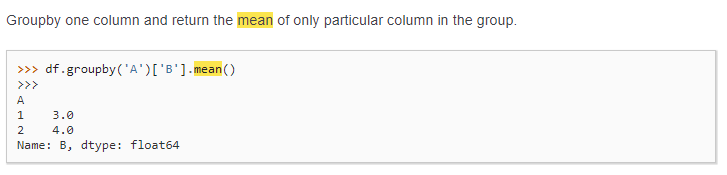

_________
### Exercise
1. Create a new code block and use the pandas `.groupby()` and `mean()` methods to put the average data in a dataframe called averaged_movie_data.
2. Create a new code block and use the `.head()` method to take a look at the data.
3. Create a markdown block to note any observations you make about the data

In [44]:
averaged_movie_data = movie_data.groupby('title')['rating'].mean()
averaged_movie_data.head()

title
'71 (2014)                                 4.0
'Hellboy': The Seeds of Creation (2004)    4.0
'Round Midnight (1986)                     3.5
'Salem's Lot (2004)                        5.0
'Til There Was You (1997)                  4.0
Name: rating, dtype: float64

Ok! Now we have movie names along with their average rating. It looks like the list is sorted on title. Wouldn't it be more helpful if the list was sorted by average rating? I would like to see the movies that had the highest ratings.

_________
### Exercise
1. Create a new code block and use the pandas `.sort_values(ascending=False)` method on the averaged_movie_data dataframe.
2. This time, try "chaining" the `head()` method on the end as a shorthand way to see the data.
3. Create a markdown block to note any observations you make about the data.

In [47]:
averaged_movie_data.sort_values(ascending=False).head()

title
Karlson Returns (1970)                           5.0
Winter in Prostokvashino (1984)                  5.0
My Love (2006)                                   5.0
Sorority House Massacre II (1990)                5.0
Winnie the Pooh and the Day of Concern (1972)    5.0
Name: rating, dtype: float64

Hmmm...The thing I noticed about this data is I have not heard of any of these movies. Why do you think that is? Do you think the data in this format will help us create a great recommender system? 

I am wondering if the number of ratings for each movie is affecting this?
_________
### Exercise
1. Run the Code Block below
3. Create a markdown block to note any observations you make about the data. Have you heard of any of the movies?

In [48]:
movie_ratings_count = movie_data.groupby('title')['rating'].count().sort_values(ascending=False)
movie_ratings_count.head()

title
Forrest Gump (1994)                 329
Shawshank Redemption, The (1994)    317
Pulp Fiction (1994)                 307
Silence of the Lambs, The (1991)    279
Matrix, The (1999)                  278
Name: rating, dtype: int64

The movies have now been sorted according to the ascending order of their ratings. However, there is a problem. A movie can make it to the top of the above list even if only a single user has given it five stars. Therefore, the above stats can be misleading. Normally, a movie which is really a good one gets a higher rating by a large number of users.

Let's take a look at some moview with lots of ratings.

_________
### Exercise
1. Run the Code Block below
3. Create a markdown block to note any observations you make about the data. Have you heard of any of the movies?

In [49]:
ratings_mean_count = pd.DataFrame(averaged_movie_data)
ratings_mean_count['rating_counts'] = pd.DataFrame(movie_ratings_count)  
ratings_mean_count.head()  

rating  rating_counts
title                                                         
'71 (2014)                                  4.0              1
'Hellboy': The Seeds of Creation (2004)     4.0              1
'Round Midnight (1986)                      3.5              2
'Salem's Lot (2004)                         5.0              1
'Til There Was You (1997)                   4.0              2

Now you can see some really good movies at the top. The above list supports our point that good movies normally receive higher ratings. Now we know that both the average rating per movie and the number of ratings per movie are important attributes. Let's create a new dataframe that contains both of these attributes.

We'll first add the average rating of each movie to the data frame. 

Next, we need to add the number of ratings for a movie to the ratings_mean_count dataframe. 

_________
### Exercise
1. Run the Code Block below
3. Create a markdown block to note any observations you make about the data. 

In [62]:
ratings_mean_count = pd.DataFrame(movie_data.groupby('title')['rating'].mean())  
ratings_mean_count['rating_counts'] = pd.DataFrame(movie_data.groupby('title')['rating'].count())  
ratings_mean_count.head(20)  



rating  rating_counts
title                                                               
'71 (2014)                                   4.000000              1
'Hellboy': The Seeds of Creation (2004)      4.000000              1
'Round Midnight (1986)                       3.500000              2
'Salem's Lot (2004)                          5.000000              1
'Til There Was You (1997)                    4.000000              2
'Tis the Season for Love (2015)              1.500000              1
'burbs, The (1989)                           3.176471             17
'night Mother (1986)                         3.000000              1
(500) Days of Summer (2009)                  3.666667             42
*batteries not included (1987)               3.285714              7
...All the Marbles (1981)                    2.000000              1
...And Justice for All (1979)                3.166667              3
00 Schneider - Jagd auf Nihil Baxter (1994)  4.500000              1
1-900 (06) (1994)                            4.000000              1
10 (1979)                                    3.375000              4
10 Cent Pistol (2015)                        1.250000              2
10 Cloverfield Lane (2016)                   3.678571             14
10 Items or Less (2006)                      2.666667              3
10 Things I Hate About You (1999)            3.527778             54
10 Years (2011)                              3.500000              1

Now, we have our data mapped to show both the rating and the number of ratings. Continuing to explore our data, let's use the `matplotlib` library to help give us an idea of how many ratings there are for each movie.

# Step 4 - Visualize the Data
For the next section, we will be using the matplotlib library to visualize the data we are working with,

Text(0, 0.5, 'Number of Movies')

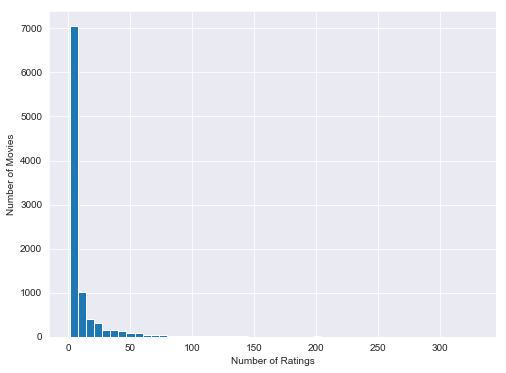

In [63]:
import matplotlib.pyplot as plt  
import seaborn as sns  
sns.set_style('dark')  
%matplotlib inline

plt.figure(figsize=(8,6))  
plt.rcParams['patch.force_edgecolor'] = True  
ratings_mean_count['rating_counts'].hist(bins=50)  
plt.xlabel("Number of Ratings")
plt.ylabel("Number of Movies")

From this, we can see that a vast majority of the movies have less than 50 ratings. Let's take a look at the average ratings using a histogram. 

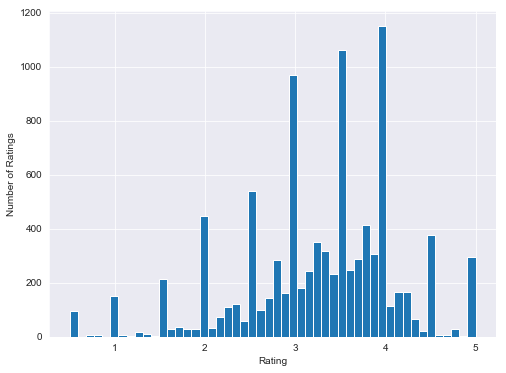

In [64]:
plt.figure(figsize=(8,6))  
plt.rcParams['patch.force_edgecolor'] = True  
plt.xlabel("Rating")
plt.ylabel("Number of Ratings")
ratings_mean_count['rating'].hist(bins=50)  


We generally believe that movies with a higher number of ratings usually have a high average rating as well since a good movie is normally well-known and a well-known movie is watched by a large number of people, and thus usually has a higher rating. Let's see if this is also the case with the movies in our dataset. We will plot average ratings against the number of ratings:

<Figure size 576x432 with 0 Axes>

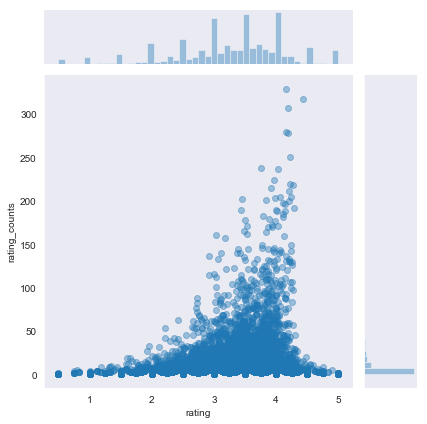

In [65]:
plt.figure(figsize=(8,6))  
plt.rcParams['patch.force_edgecolor'] = True  
sns.jointplot(x='rating', y='rating_counts', data=ratings_mean_count, alpha=0.4)  

The graph shows that, in general, movies with higher average ratings actually have more number of ratings, compared with movies that have lower average ratings.

# Step 5 - Take Action and Make Decisions
We spent quite a bit of time on visualizing and preprocessing our data. Now is the time to find the similarity between movies.

We will use the correlation between the ratings of a movie as the similarity metric. To find the correlation between the ratings of the movie, we need to create a matrix where each column is a movie name and each row contains the rating assigned by a specific user to that movie. Bear in mind that this matrix will have a lot of null values since every movie is not rated by every user.

In [66]:
user_movie_rating = movie_data.pivot_table(index='userId', columns='title', values='rating')  
user_movie_rating.head() 

title   '71 (2014)  'Hellboy': The Seeds of Creation (2004)  \
userId                                                        
1              NaN                                      NaN   
2              NaN                                      NaN   
3              NaN                                      NaN   
4              NaN                                      NaN   
5              NaN                                      NaN   

title   'Round Midnight (1986)  'Salem's Lot (2004)  \
userId                                                
1                          NaN                  NaN   
2                          NaN                  NaN   
3                          NaN                  NaN   
4                          NaN                  NaN   
5                          NaN                  NaN   

title   'Til There Was You (1997)  'Tis the Season for Love (2015)  \
userId                                                               
1                             NaN                              NaN   
2                             NaN                              NaN   
3                             NaN                              NaN   
4                             NaN                              NaN   
5                             NaN                              NaN   

title   'burbs, The (1989)  'night Mother (1986)  (500) Days of Summer (2009)  \
userId                                                                          
1                      NaN                   NaN                          NaN   
2                      NaN                   NaN                          NaN   
3                      NaN                   NaN                          NaN   
4                      NaN                   NaN                          NaN   
5                      NaN                   NaN                          NaN   

title   *batteries not included (1987)  \
userId                                   
1                                  NaN   
2                                  NaN   
3                                  NaN   
4                                  NaN   
5                                  NaN   

title                     ...                      Zulu (2013)  [REC] (2007)  \
userId                    ...                                                  
1                         ...                              NaN           NaN   
2                         ...                              NaN           NaN   
3                         ...                              NaN           NaN   
4                         ...                              NaN           NaN   
5                         ...                              NaN           NaN   

title   [REC]² (2009)  [REC]³ 3 Génesis (2012)  \
userId                                           
1                 NaN                      NaN   
2                 NaN                      NaN   
3                 NaN                      NaN   
4                 NaN                      NaN   
5                 NaN                      NaN   

title   anohana: The Flower We Saw That Day - The Movie (2013)  \
userId                                                           
1                                                     NaN        
2                                                     NaN        
3                                                     NaN        
4                                                     NaN        
5                                                     NaN        

title   eXistenZ (1999)  xXx (2002)  xXx: State of the Union (2005)  \
userId                                                                
1                   NaN         NaN                             NaN   
2                   NaN         NaN                             NaN   
3                   NaN         NaN                             NaN   
4                   NaN         NaN                             NaN   
5                

We know that each column contains all the user ratings for a particular movie. Let's find all the user ratings for the movie "Forrest Gump (1994)" and find the movies similar to it. We chose this movie since it has the highest number of ratings and we want to find the correlation between movies that have a higher number of ratings.

To find the user ratings for "Forrest Gump (1994)", execute the following script:

In [75]:
forrest_gump_ratings = user_movie_rating['Forrest Gump (1994)']  
forrest_gump_ratings.head(10)  

userId
1     4.0
2     NaN
3     NaN
4     NaN
5     NaN
6     5.0
7     5.0
8     3.0
9     NaN
10    3.5
Name: Forrest Gump (1994), dtype: float64

Now let's retrieve all the movies that are similar to "Forrest Gump (1994)". We can find the correlation between the user ratings for the "Forest Gump (1994)" and all the other movies using corrwith() function as shown below:

In [76]:
movies_like_forest_gump = user_movie_rating.corrwith(forrest_gump_ratings)

corr_forrest_gump = pd.DataFrame(movies_like_forest_gump, columns=['Correlation'])  
corr_forrest_gump.dropna(inplace=True)  
corr_forrest_gump.head()  

Correlation
title                                      
'burbs, The (1989)                 0.197712
(500) Days of Summer (2009)        0.234095
*batteries not included (1987)     0.892710
...And Justice for All (1979)      0.928571
10 Cent Pistol (2015)             -1.000000

In the above script, we first retrieved the list of all the movies related to "Forrest Gump (1994)" along with their correlation value, using corrwith() function. Next, we created a dataframe that contains movie title and correlation columns. We then removed all the NA values from the dataframe and displayed its first 5 rows using the head function.

Let's sort the movies in descending order of correlation to see highly correlated movies at the top. Execute the following script:

In [69]:
corr_forrest_gump.sort_values('Correlation', ascending=False).head(10) 

Correlation
title                                                 
Lost & Found (1999)                                1.0
Century of the Self, The (2002)                    1.0
The 5th Wave (2016)                                1.0
Play Time (a.k.a. Playtime) (1967)                 1.0
Memories (Memorîzu) (1995)                         1.0
Playing God (1997)                                 1.0
Killers (2010)                                     1.0
Girl Walks Home Alone at Night, A (2014)           1.0
Tampopo (1985)                                     1.0
Cercle Rouge, Le (Red Circle, The) (1970)          1.0

From the output you can see that the movies that have high correlation with "Forrest Gump (1994)" are not very well known. This shows that correlation alone is not a good metric for similarity because there can be a user who watched '"Forest Gump (1994)" and only one other movie and rated both of them as 5.

A solution to this problem is to retrieve only those correlated movies that have at least more than 50 ratings. To do so, will add the rating_counts column from the rating_mean_count dataframe to our corr_forrest_gump dataframe. Execute the following script to do so:

In [70]:
corr_forrest_gump = corr_forrest_gump.join(ratings_mean_count['rating_counts'])  
corr_forrest_gump.head()  

Correlation  rating_counts
title                                                     
'burbs, The (1989)                 0.197712             17
(500) Days of Summer (2009)        0.234095             42
*batteries not included (1987)     0.892710              7
...And Justice for All (1979)      0.928571              3
10 Cent Pistol (2015)             -1.000000              2

You can see that the movie "...And Justice for All (1979)", which has the highest correlation has only three ratings. This means that only three users gave same ratings to "Forest Gump (1994)", "...And Justice for All (1979)". However, we can deduce that a movie cannot be declared similar to the another movie based on just 3 ratings. This is why we added "rating_counts" column. Let's now filter movies correlated to "Forest Gump (1994)", that have more than 50 ratings. The following code will do that:

In [71]:
corr_forrest_gump[corr_forrest_gump ['rating_counts']>50].sort_values('Correlation', ascending=False).head()  

Correlation  rating_counts
title                                                
Forrest Gump (1994)           1.000000            329
Mr. Holland's Opus (1995)     0.652144             80
Pocahontas (1995)             0.550118             68
Grumpier Old Men (1995)       0.534682             52
Caddyshack (1980)             0.520328             52

Now you can see from the output the movies that are highly correlated with "Forrest Gump (1994)". The movies in the list are are also popular Hollywood movies, and since "Forest Gump (1994)" is also a very famous movie, there is a high chance that these movies are correlated.

_________
### Exercise
1. Run the following code block with our "improved" recommender to see what is recommended for 'Toy Story (1995)'.
2. Do you agree with the movies that were recommended? Why? or Why not?

In [95]:
my_movie_ratings = user_movie_rating['Princess Bride, The (1987)']  
movies_like_my_movie = user_movie_rating.corrwith(my_movie_ratings)
corr_my_movie = pd.DataFrame(movies_like_my_movie, columns=['Correlation'])  
corr_my_movie.dropna(inplace=True)   
corr_my_movie = corr_my_movie.join(ratings_mean_count['rating_counts'])  
corr_my_movie[corr_my_movie ['rating_counts']>50].sort_values('Correlation', ascending=False).head()    

Correlation  rating_counts
title                                                      
Princess Bride, The (1987)          1.000000            142
Lady and the Tramp (1955)           0.670797             55
How to Train Your Dragon (2010)     0.646725             53
Bowling for Columbine (2002)        0.617763             58
King's Speech, The (2010)           0.617258             58

In [96]:
my_movie_ratings = user_movie_rating['Before Sunrise (1995)']  
movies_like_my_movie = user_movie_rating.corrwith(my_movie_ratings)
corr_my_movie = pd.DataFrame(movies_like_my_movie, columns=['Correlation'])  
corr_my_movie.dropna(inplace=True)   
corr_my_movie = corr_my_movie.join(ratings_mean_count['rating_counts'])  
corr_my_movie[corr_my_movie ['rating_counts']>50].sort_values('Correlation', ascending=False).head()  

Correlation  rating_counts
title                                                   
Bad Boys (1995)                  1.000000             51
12 Angry Men (1957)              0.948683             57
Blazing Saddles (1974)           0.882735             62
Apocalypse Now (1979)            0.878500            107
Beverly Hills Cop III (1994)     0.866025             59

_________
### Exercise
1. Create a new code block and run our recommender with 'Princess Bride, The (1987)'
1. Create a new code block and run our recommender with 'Star Wars: Episode IV - A New Hope (1977)'
2. Create a new code block and run our recommender with 'Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981)'
4. Create a new code block and run our recommender with 'Finding Nemo (2003)'
1. Create a new code block and run our recommender with 'Dark Knight, The (2008)'
2. Do you agree with the movies that were recommended? Why? or Why not?

_________
### Exercise
1. Use the code below to look up some of your favorite movies and try them out in the recommender.

In [98]:
movie_names[movie_names['title'].str.contains('black', case=False)]

movieId                                              title  \
79         88                                 Black Sheep (1996)   
365       421                                Black Beauty (1994)   
390       449                         Fear of a Black Hat (1994)   
1183     1580                   Men in Black (a.k.a. MIB) (1997)   
1505     2033                         Black Cauldron, The (1985)   
1506     2034                             Black Hole, The (1979)   
1507     2035                          Blackbeard's Ghost (1968)   
1745     2340                              Meet Joe Black (1998)   
1978     2625                        Black Mask (Hak hap) (1996)   
2136     2843  Black Cat, White Cat (Crna macka, beli macor) ...   
2477     3300                                 Pitch Black (2000)   
2480     3303  Black Tar Heroin: The Dark End of the Street (...   
2864     3832    Black Sabbath (Tre volti della paura, I) (1963)   
2931     3930         Creature from the Black Lagoon, The (1954)   
3364     4572                                  Black Rain (1989)   
3440     4688                                  Black Robe (1991)   
3576     4899                                Black Knight (2001)   
3646     5010                             Black Hawk Down (2001)   
3885     5459  Men in Black II (a.k.a. MIIB) (a.k.a. MIB 2) (...   
4081     5828                                   Blackrock (1997)   
4155     5980                             Black Christmas (1974)   
4235     6169                 Black Stallion Returns, The (1983)   
4236     6170                         Black Stallion, The (1979)   
4427     6539  Pirates of the Caribbean: The Curse of the Bla...   
4589     6817                   White Hunter, Black Heart (1990)   
4762     7088                 Black Orpheus (Orfeu Negro) (1959)   
4875     7305                                 Black Widow (1987)   
5101     8094                       Bad Day at Black Rock (1955)   
5157     8338                             Black Narcissus (1947)   
5192     8451                           Blackboard Jungle (1955)   
5306     8799                           Little Black Book (2004)   
5813    32009    Tyler Perry's Diary of a Mad Black Woman (2005)   
6300    48142                           Black Dahlia, The (2006)   
6378    50147                             Black Christmas (2006)   
6419    51091                            Black Snake Moan (2006)   
6449    52042                      Black Book (Zwartboek) (2006)   
6602    55553                                 Black Sheep (2006)   
6937    65133                     Blackadder Back & Forth (1999)   
6938    65135                Blackadder's Christmas Carol (1988)   
7074    69746      Watchmen: Tales of the Black Freighter (2009)   
7177    72171                              Black Dynamite (2009)   
7456    81591                                  Black Swan (2010)   
7808    92422                         Woman in Black, The (2012)   
7883    94777       Men in Black III (M.III.B.) (M.I.B.³) (2012)   
8240   104272                                   Blackfish (2013)   
8620   118706                                   Black Sea (2015)   
8651   120637                                    Blackhat (2015)   
8692   122906                               Black Panther (2017)   
8771   128852                Chris Rock: Bigger & Blacker (1999)   
8928   136018                                  Black Mass (2015)   
9142   147326  The Adventures of Sherlock Holmes and Doctor W...   
9570   174053               Black Mirror: White Christmas (2014)   
9611   176601                                       Black Mirror   
9723   189713                              BlacKkKlansman (2018)   
9737   193581          Black Butler: Book of the Atlantic (2017)   

                                      genres  
79                                    Comedy  
365                 Adventure|Children|Drama  
390                                   Comedy  
1183     